# FASHION CLASS CLASSIFICATION

## Importing Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
fashion_train_df = pd.read_csv('datasets/fashion-mnist_train.csv')
fashion_test_df = pd.read_csv('datasets/fashion-mnist_test.csv')

## EDA

In [11]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
fashion_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [19]:
fashion_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


In [3]:
training = np.array(fashion_train_df, dtype= 'float32')
testing = np.array(fashion_test_df, dtype= 'float32')

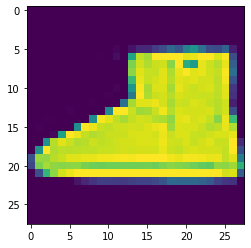

In [35]:
# Let's view some images!
plt.imshow(training[16,1:].reshape(28,28)) # reshape and plot the image
# Here we use [...,1:] because the first column of our table is the label so we need to exclude it to show the image

In [5]:
# Let's view random images of the dataset with property random
import random
i = random.randint(1,60000) # select any random index from 1 to 60,000

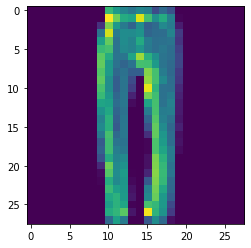

In [6]:
plt.imshow(training[i,1:].reshape(28,28))

In [7]:
# We know that the label is the first column so :
label = training[i,0]

6.0

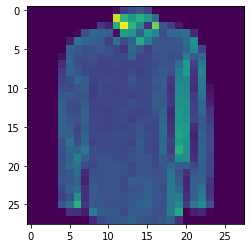

In [8]:
# If we put everything together we have :
# We know that the label is the first column so :
import random
i = random.randint(1,60000)
plt.imshow(training[i,1:].reshape(28,28))
label = training[i,0]
label

In [47]:
# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot
# So here, the label is right since it's a shirt

### Data in a matrix format

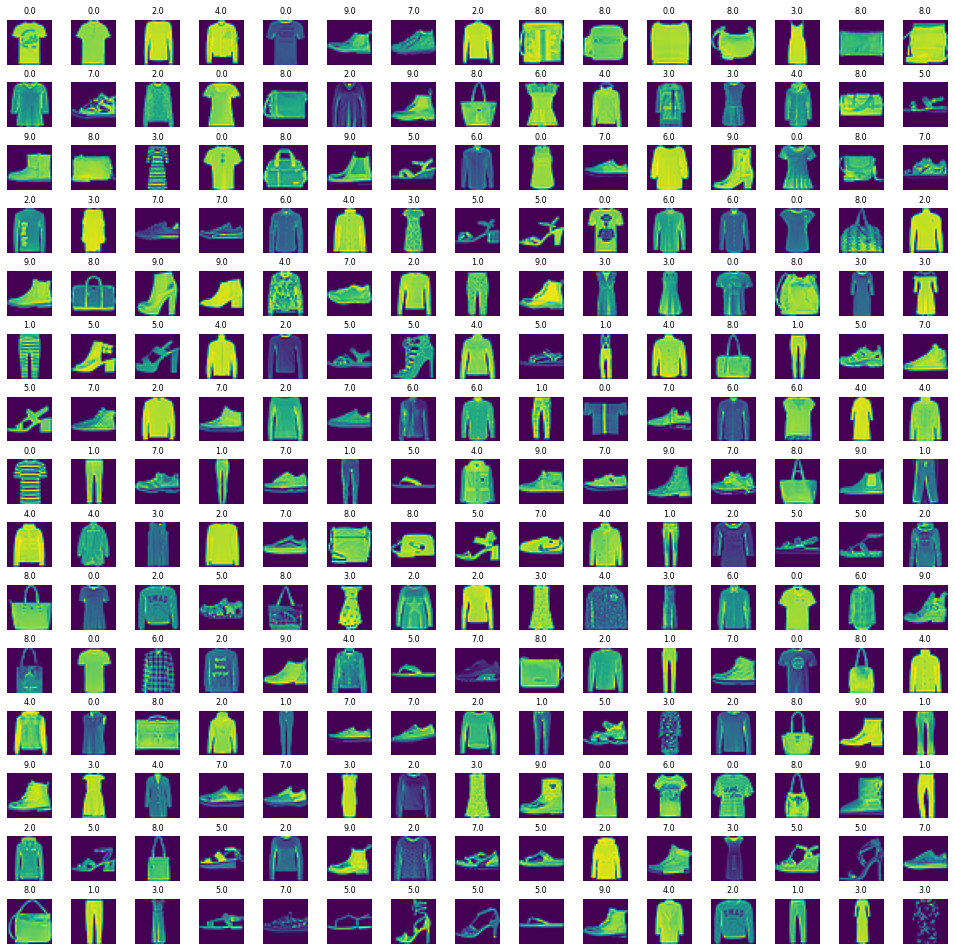

In [48]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(training) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( training[index,1:].reshape((28,28)))
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

## Model Training (with Convolutional Neuron Network)

In [ ]:
# Prepare the training and testing dataset

In [9]:
X_train = training[:,1:]/255 # We divide by 255 as a normalization here
y_train = training[:,0]


X_test = testing[:,1:]/255 # We divide by 255 as a normalization here
y_test = testing[:,0]

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=12345)

In [11]:
# We need to reshape the images in 28*28 as this is the format recognised by the algorithm in this case

X_train = X_train.reshape(X_train.shape[0], *(28,28,1))
X_test = X_test.reshape(X_test.shape[0], *(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28,28,1))

In [12]:
X_train.shape

(48000, 28, 28, 1)

In [13]:
X_validate.shape

(12000, 28, 28, 1)

In [14]:
X_test.shape

(10000, 28, 28, 1)

In [15]:
# Let's use keras as the open source Neural network of this model

import keras

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

In [17]:
cnn_model = Sequential()

In [18]:
# Convolution
cnn_model.add(Conv2D(32,3,3,input_shape=(28,28,1),activation='relu'))

In [19]:
# Max Pooling
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

In [20]:
# Flattening
cnn_model.add(Flatten())

In [21]:
# Number of hidden layers we want to include between the outputs
cnn_model.add(Dense(units = 32, activation = 'relu'))
cnn_model.add(Dense(units = 10, activation = 'sigmoid'))

In [22]:
cnn_model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics =['accuracy'])

In [23]:
cnn_model.fit(X_train,
              y_train,
              batch_size=512,
              epochs=60,
              verbose=1,
              validation_data=(X_validate,y_validate))

Epoch 1/60
94/94 [==============================] - 2s 19ms/step - loss: 1.3610 - accuracy: 0.5729 - val_loss: 0.7546 - val_accuracy: 0.7317
Epoch 2/60
94/94 [==============================] - 2s 18ms/step - loss: 0.6770 - accuracy: 0.7538 - val_loss: 0.6182 - val_accuracy: 0.7739
Epoch 3/60
94/94 [==============================] - 2s 25ms/step - loss: 0.5864 - accuracy: 0.7853 - val_loss: 0.5593 - val_accuracy: 0.7972
Epoch 4/60
94/94 [==============================] - 2s 23ms/step - loss: 0.5391 - accuracy: 0.8041 - val_loss: 0.5230 - val_accuracy: 0.8109
Epoch 5/60
94/94 [==============================] - 2s 24ms/step - loss: 0.5084 - accuracy: 0.8154 - val_loss: 0.4937 - val_accuracy: 0.8232
Epoch 6/60
94/94 [==============================] - 2s 24ms/step - loss: 0.4847 - accuracy: 0.8240 - val_loss: 0.4763 - val_accuracy: 0.8289
Epoch 7/60
94/94 [==============================] - 2s 21ms/step - loss: 0.4643 - accuracy: 0.8318 - val_loss: 0.4687 - val_accuracy: 0.8326
Epoch 8/60
94

## Model Predidtions & Evaluation

In [24]:
evaluation = cnn_model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3313 - accuracy: 0.8752


In [39]:
prediction = np.argmax(cnn_model.predict(X_test), axis=-1)

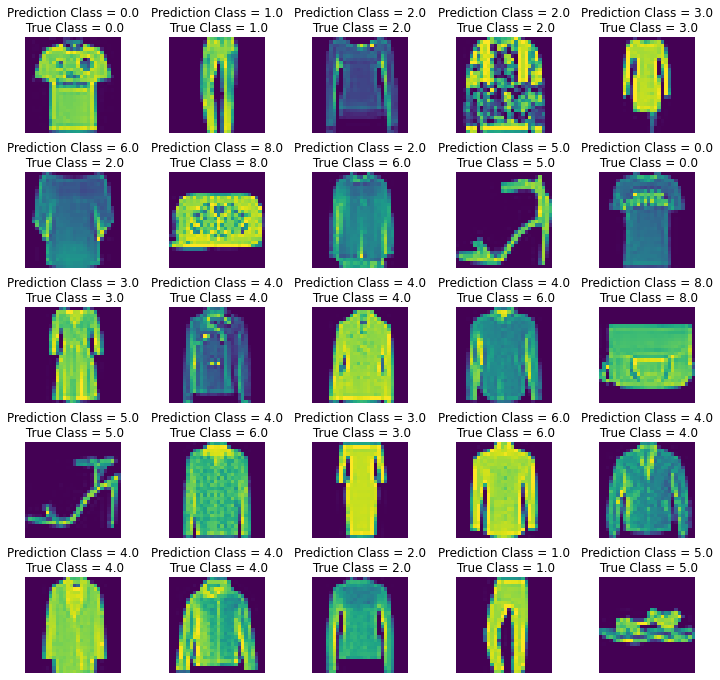

In [40]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(prediction[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,prediction)
print(cm)

[[876   2  22  25   1   1  66   1   6   0]
 [  2 972   2  16   2   3   2   0   1   0]
 [ 22   1 806   7  97   0  59   0   8   0]
 [ 26  17  13 874  37   0  33   0   0   0]
 [  1   0  73  22 828   0  73   0   3   0]
 [  0   1   0   0   0 954   0  31   3  11]
 [170   2 100  31  90   0 592   0  15   0]
 [  0   0   0   0   0  29   0 933   0  38]
 [  4   2   3   1   3   3   8   3 971   2]
 [  0   0   0   0   0   6   0  47   1 946]]


<AxesSubplot:>

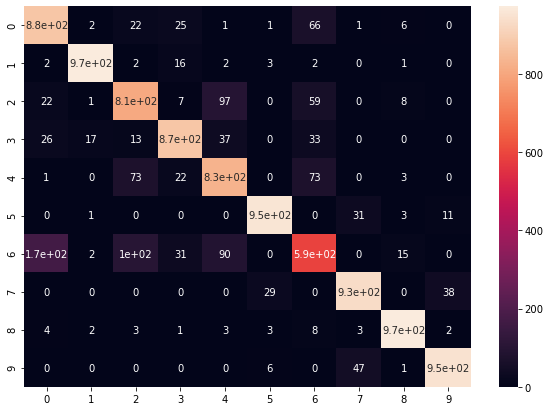

In [47]:
# Let's print it as a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

         0.0       0.80      0.88      0.83      1000
         1.0       0.97      0.97      0.97      1000
         2.0       0.79      0.81      0.80      1000
         3.0       0.90      0.87      0.88      1000
         4.0       0.78      0.83      0.80      1000
         5.0       0.96      0.95      0.96      1000
         6.0       0.71      0.59      0.65      1000
         7.0       0.92      0.93      0.93      1000
         8.0       0.96      0.97      0.97      1000
         9.0       0.95      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.87      0.88      0.87     10000
weighted avg       0.87      0.88      0.87     10000



In [51]:
# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

## Model Improvement

Using the same model but with different ways :

1) (64, 3, 3) kernel without dropout

2) (64, 3, 3) kernel with dropout